In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt


df = pd.read_csv("cleaner_data.csv")

X = df.drop("bad_flag", axis=1)
y = df["bad_flag"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


results = {}

# ===== Logistic Regression =====
lr_model = LogisticRegression()  # No class_weight
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

results["Logistic Regression"] = {
    "Precision": precision_score(y_test, lr_preds),
    "Recall": recall_score(y_test, lr_preds),
    "F1": f1_score(y_test, lr_preds),
    "ROC AUC": roc_auc_score(y_test, lr_probs)
}

# ===== XGBoost =====
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

results["XGBoost"] = {
    "Precision": precision_score(y_test, xgb_preds),
    "Recall": recall_score(y_test, xgb_preds),
    "F1": f1_score(y_test, xgb_preds),
    "ROC AUC": roc_auc_score(y_test, xgb_probs)
}

# ===== LightGBM =====
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

results["LightGBM"] = {
    "Precision": precision_score(y_test, lgb_preds),
    "Recall": recall_score(y_test, lgb_preds),
    "F1": f1_score(y_test, lgb_preds),
    "ROC AUC": roc_auc_score(y_test, lgb_probs)
}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:48:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1098, number of negative: 76346
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.204283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69734
[LightGBM] [Info] Number of data points in the train set: 77444, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.014178 -> initscore=-4.241785
[LightGBM] [Info] Start training from score -4.241785


In [15]:
# ===== Random Forest =====
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

results["Random Forest"] = {
    "Precision": precision_score(y_test, rf_preds),
    "Recall": recall_score(y_test, rf_preds),
    "F1": f1_score(y_test, rf_preds),
    "ROC AUC": roc_auc_score(y_test, rf_probs)
}

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


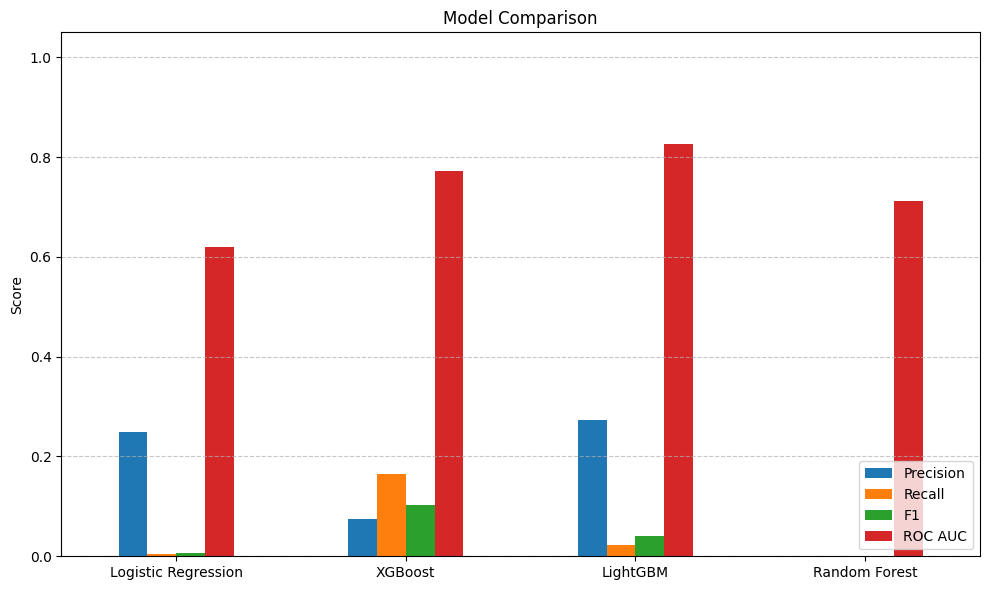

{'Logistic Regression': {'Precision': 0.25, 'Recall': 0.0036496350364963502, 'F1': 0.007194244604316547, 'ROC AUC': np.float64(0.6203522983829026)}, 'XGBoost': {'Precision': 0.07550335570469799, 'Recall': 0.16423357664233576, 'F1': 0.10344827586206896, 'ROC AUC': np.float64(0.7727507556243537)}, 'LightGBM': {'Precision': 0.2727272727272727, 'Recall': 0.021897810218978103, 'F1': 0.04054054054054054, 'ROC AUC': np.float64(0.8270469160125061)}, 'Random Forest': {'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': np.float64(0.7120121901787189)}}


In [16]:
# ===== Plotting Bar Graph =====
metrics_df = pd.DataFrame(results).T  # Transpose for plotting

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(results)